In [1]:
import os
import tomopy
import numpy as np
from imars3d.filters import tilt
import matplotlib.pyplot as plt
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
import utilities as rocku
import dxchange
import algotom.io.loadersaver as losa
import algotom.prep.correction as corr
import algotom.io.converter as conv
import h5py as h5f
import timeit
from joblib import Parallel, delayed

olefile module not found


In [2]:
# %matplotlib notebook
%matplotlib inline

# Workflow starts here!

In [3]:
###################### need to change start
ipts="29298"
###################### need to change end

In [4]:
# ct_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/ct_scans"
# ct_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/autoreduce/raw_to_recon"
output_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/autoreduce/hdf5/"
os.listdir(output_loc)

['2022_09_29_sample2.h5', '2022_09_29_sample1.h5']

In [5]:
###################### need to change start
sample_name = "2022_09_29_sample1"
output_hdf5 = output_loc + sample_name + ".h5"
###################### need to change end

# Load hdf5 file

In [6]:
losa.get_hdf_tree(output_hdf5)

 tomo
    │
    ├── meta
    │   │
    │   ├── ang_deg (783,)
    │   ├── ang_rad (783,)
    │   ├── fname (783,)
    │   ├── proj180_idx (1,)
    │   └── ring_rmv (1,)
    ├── proj
    │   │
    │   ├── dc_fake (1850, 750)
    │   ├── ob_fake (1850, 750)
    │   ├── proj_norm (783, 1850, 750)
    │   └── proj_rmv (783, 1850, 750)
    └── sino
        │
        ├── sino_norm (1850, 783, 750)
        └── sino_rmv (1850, 783, 750)


deque([' tomo',
       '    │',
       '    ├── meta',
       '    │   │',
       '    │   ├── ang_deg (783,)',
       '    │   ├── ang_rad (783,)',
       '    │   ├── fname (783,)',
       '    │   ├── proj180_idx (1,)',
       '    │   └── ring_rmv (1,)',
       '    ├── proj',
       '    │   │',
       '    │   ├── dc_fake (1850, 750)',
       '    │   ├── ob_fake (1850, 750)',
       '    │   ├── proj_norm (783, 1850, 750)',
       '    │   └── proj_rmv (783, 1850, 750)',
       '    └── sino',
       '        │',
       '        ├── sino_norm (1850, 783, 750)',
       '        └── sino_rmv (1850, 783, 750)'])

In [8]:
proj_norm = losa.load_hdf(output_hdf5, key_path='tomo/proj/proj_norm')

In [9]:
proj_norm.shape

(783, 1850, 750)

In [10]:
sino_norm = losa.load_hdf(output_hdf5, key_path='tomo/sino/sino_norm')
sino_rmv = losa.load_hdf(output_hdf5, key_path='tomo/sino/sino_rmv')

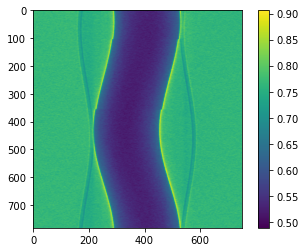

In [11]:
plt.imshow(sino_rmv[600])
plt.colorbar()
plt.show()

In [11]:
proj_norm[:,600,:].shape

(783, 750)

In [22]:
t0 = timeit.default_timer()
results = Parallel(n_jobs=16, prefer="threads")(delayed(rocku.remove_ring)(proj_norm[i], 'bm3d') for i in range(proj_norm.shape[0]))
t1 = timeit.default_timer()
print("Time cost {} min".format((t1-t0)/60))

Median filtering, iteration 0
Median filtering, iteration 0Median filtering, iteration 0

Median filtering, iterationMedian filtering, iteration 0
Median filtering, iteration 0
Median filtering, iterationMedian filtering, iteration 0
 0
 0
Median filtering, iteration 0
Median filtering, iteration 0
Median filtering, iteration 0
Median filtering, iteration 0
Median filtering, iteration 0
Median filtering, iteration 0
Median filtering, iteration 0
Median filtering, iteration 0
Median filtering, iteration 1
Median filtering, iteration 1
Median filtering, iterationMedian filtering, iteration 1
 Median filtering, iterationMedian filtering, iteration1Median filtering, iteration
  1
1
 1
Median filtering, iteration 1
Median filtering, iteration 1
Median filtering, iteration 1
Median filtering, iterationMedian filtering, iteration Median filtering, iteration 1
 1
Median filtering, iteration Median filtering, iteration11
 
1
Median filtering, iteration 1
Median filtering, iteration 2
Median fil

Denoising sinogramMedian filtering, iteration 2
 0
Denoising sinogram 0
k:k:  4
4
Median filtering, iteration 2
k: 3
Denoising sinogram 0
k:Denoising sinogram 4
 0
k: 4
k: 3
k: 3
k: 3
k: 3
k: 3
k: 3
k: 3
k: 3
k: 3
k: 3
k: 3
k: 3
k: 3
k: 3
k: 2
k: 2
k: 2
k: 2
k: 2
k: 2
k: 2
k: 2
k: 2
k: 2
k: 2
k: 2
k: 2
k: 2
k: 2
k: 2
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
Median filtering, iteration 0
Median filtering, iteration 1
Median filtering, iteration 2
Denoising sinogramMedian filtering, iteration  00

k: 4
Median filtering, iteration 1
Median filtering, iteration 0
Median filtering, iteration 0
Median filtering, iteration 2
Median filtering, iteration 0
Median filtering, iteration 1
Median filtering, iteration 1
Denoising sinogram 0
k: 4
Median filtering, iteration 0
Median filtering, iteration 0
Median filtering, iteration 1
Median filtering, iteration 0
Median filtering, i

2
Median filtering, iteration 2
Median filtering, iteration Median filtering, iteration0
 k: 3
0
Median filtering, iteration 1
k: 3
Median filtering, iteration 2
Denoising sinogram 0
Median filtering, iterationk: 4
 2
Median filtering, iteration 2
Denoising sinogramDenoising sinogram  00

Median filtering, iteration 1
k: k:4
 4
Median filtering, iteration 1
Median filtering, iteration 2
Denoising sinogram 0
k: 4
Denoising sinogram 0
k: 4
Denoising sinogram 0
Denoising sinogram 0
k: 4
k: 4
Median filtering, iteration 2
Median filtering, iteration 2
Denoising sinogram 0
k: 4
k: 3
Denoising sinogram 0
Denoising sinogram 0
k: 4
k: 4
k: 3
k: 3
k: 3
k: 3
k: 3
k: 3
k:k:  3
3
k: 3
k: 3
k: 3
k: 3
k: 3
k: 2
k: 2
k: 2
k: 2
k: 2
k: 2
k: 2
k: k:2
 2
k: 2
k: 2
k: 2
k: 2
k: 2
k: 2
k: 2
k: 1
k: 1
k: 1
k: 1
k: 1
k:k:  11

k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: k:0 0

k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
Median filtering, iteration 0
Median filtering, iteration 

Median filtering, iteration 1
Denoising sinogram 0
k: 4
Denoising sinogram 0
k:Median filtering, iteration 1
 4Denoising sinogram 0

k: 4
Denoising sinogramMedian filtering, iteration 0
 Median filtering, iteration 2
0
k: 4
Median filtering, iteration 0
Median filtering, iteration 1
Median filtering, iteration 2
Median filtering, iteration 2
Median filtering, iteration 0
Denoising sinogram 0
Median filtering, iteration 1
Median filtering, iteration k: 4
1
Median filtering, iteration 2
Denoising sinogram 0
k: 4
Median filtering, iteration 0
Median filtering, iteration 1
Median filtering, iteration Denoising sinogram2 0

k: 4
Median filtering, iteration 2
k: 3
Median filtering, iteration 0
Denoising sinogram 0
Median filtering, iteration 2
Denoising sinogram 0
k: 4
k: 4
Median filtering, iteration 1
Denoising sinogram 0
k: 4
Median filtering, iteration 1
Denoising sinogram 0
k: 4
Median filtering, iteration 2
Median filtering, iteration 2
k: 3
k: 3
Denoising sinogram 0
k: 4
Median filter

Median filtering, iteration 1
Median filtering, iteration 0
Median filtering, iterationMedian filtering, iteration 0
 0
Median filtering, iteration 1
Denoising sinogram 0
k: 4
Median filtering, iterationDenoising sinogram 0
 0
Median filtering, iteration 0
k: 4
Median filtering, iteration 2Median filtering, iteration
 1
Median filtering, iterationMedian filtering, iteration 1
 2
Median filtering, iteration 1
Median filtering, iteration 0
Median filtering, iterationMedian filtering, iteration 1
 0
Median filtering, iteration 0
Median filtering, iteration 1
Median filtering, iteration 0
Median filtering, iteration 2
Denoising sinogramMedian filtering, iteration 2
 0
Denoising sinogram 0
k: k:4
 4
Median filtering, iteration 1
Median filtering, iteration 2
Median filtering, iteration 2
Median filtering, iterationMedian filtering, iteration 1
 2
Median filtering, iteration 1
Median filtering, iteration 0
Median filtering, iteration 1
Denoising sinogram 0
k: 4
Denoising sinogram 0
Median fi

Denoising sinogram 0
k: 4
k: 2
k: 2
k: 2
k: 2
k: 2
k: 2
k: 2
k: 2
k:k: 3
 2
k: 2
k: 2
k: 2
k: 2
k: 2
k: 2
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
Median filtering, iteration 0
Median filtering, iteration 0
Median filtering, iteration 1
Median filtering, iteration 1
Median filtering, iteration 2
Median filtering, iteration 2
Denoising sinogram 0
Denoising sinogram 0
k: 4
k: 4
Median filtering, iteration 0
Median filtering, iteration 0Median filtering, iteration 
0
Median filtering, iterationMedian filtering, iteration 0 
0
Median filtering, iteration 0
Median filtering, iteration 1
Median filtering, iteration 1
Median filtering, iteration 1
Median filtering, iteration 0
Median filtering, iterationMedian filtering, iteration  00

Median filtering, iteration 1
Median filtering, iteration 1
Median filtering, iteration Median filtering, iteration2 0

Median filtering, iter

Median filtering, iteration 1
k: 4
Median filtering, iteration 2
Median filtering, iteration 2
Median filtering, iteration 1
Denoising sinogram 0
k: 4
Denoising sinogram 0
Median filtering, iteration 2
k: 3
k: 4
Denoising sinogram 0
Denoising sinogram 0
k: 4
k:Median filtering, iteration  24

Denoising sinogram 0
k: 3
k: 4
Denoising sinogram 0
k: 4
k: 3
k: 3
k: 3
k: 3
k: 3
k: 3
k: 3
k: 3
k: 3
k: 3
k: 3
k: 3
k: 3
Median filtering, iteration 0
k: 2
Median filtering, iteration 1
Median filtering, iteration 2
k: 2
k: 2
Denoising sinogram 0
k: 4
k: 2
k: 2
k: 2
k: 2
k: 2
k: 2
k: 2
k: 2
k: 2
k: 2
k: 2
k: 2
k: 3
k: 2
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 1
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
Median filtering, iteration 0
Median filtering, iteration 0
Median filtering, iteration 1
Median filtering, iteration 0
Median filtering, iteration 0
Median filtering, iteration 1
Median filtering, iteration 2
Median filter

k: 4
Median filtering, iteration 2
Median filtering, iteration 0
Median filtering, iteration 2
Median filtering, iterationMedian filtering, iteration  0
1Median filtering, iteration 2

Median filtering, iteration 1
Denoising sinogram 0
k:Denoising sinogram 0
 4
k: 4
Median filtering, iteration 2
Denoising sinogram 0
k: 4
Median filtering, iteration 0Median filtering, iteration
 1
Median filtering, iteration 0
Median filtering, iteration 2
Denoising sinogram 0
k: 4
Median filtering, iteration 1
Median filtering, iteration 0
Median filtering, iteration 2
Median filtering, iteration 1
Denoising sinogram 0
k: 4
Median filtering, iteration 2
k: 3
k: 3
Median filtering, iteration 1
Denoising sinogram 0
Median filtering, iteration 2
k: 4
k: 3
k: 3
k: 3
Denoising sinogram 0
Median filtering, iteration 2k: 
4
k: 3
Denoising sinogram 0
k: 4
Denoising sinogram 0
k: 4
k: 3
k: 3
k: 3
k: 3
k: 3
k: 3
k: 3
k: 3
k: 3
Median filtering, iteration 0
Median filtering, iteration 1
Median filtering, iteratio

Median filtering, iteration 0
Median filtering, iteration 1
Median filtering, iteration 0
Median filtering, iteration 2Median filtering, iteration
 2
Median filtering, iteration 1
Denoising sinogram 0
k: 4
Median filtering, iteration 0
Median filtering, iteration 0
Median filtering, iteration 1
Median filtering, iteration 0
Denoising sinogram 0
Denoising sinogram 0
k: 4
Median filtering, iteration 0
k:Median filtering, iteration 2
 4
Median filtering, iteration 1
Median filtering, iteration 1
Median filtering, iteration 2
Median filtering, iteration 0
Median filtering, iteration 1
Median filtering, iteration 1
Denoising sinogram 0
Median filtering, iteration 2
k: 4
Median filtering, iteration 2
k: 3
Denoising sinogram 0
Median filtering, iteration 1
k: 4
Median filtering, iteration 2
Median filtering, iteration 2
Denoising sinogram 0
k: 4
Denoising sinogram 0
k: 3
k: 4
Denoising sinogram 0
Median filtering, iteration 2
k: 4
Denoising sinogram 0
k: 4
Median filtering, iteration 0
Median

k: 1
k: 1
k: 1
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
k: 0
Median filtering, iteration 0
Median filtering, iteration 0
Median filtering, iteration 1
Median filtering, iteration 1
Median filtering, iteration 0
Median filtering, iteration 2
Median filtering, iteration 0
Median filtering, iteration 2
Median filtering, iteration 0
Median filtering, iteration 0
Median filtering, iteration 1
Denoising sinogram 0
Median filtering, iteration 0
Median filtering, iteration 1
k: 4
Denoising sinogram 0
k: 4
Median filtering, iteration 1
Median filtering, iteration 1
Median filtering, iteration 1
Median filtering, iteration 2
Median filtering, iterationMedian filtering, iteration 0
 2
Median filtering, iteration 0
Median filtering, iteration 0
Median filtering, iteration 0
Median filtering, iterationMedian filtering, iteration 2 2

Median filtering, iteration 2
Denoising sinogram Denoising sinogram 00

k: 4
k:Median filtering, iteration  14

Median filtering, ite

KeyboardInterrupt: 

# Export to HDF5

In [36]:
with h5f.File(output_hdf5, mode='a') as f:
    f.create_group('tomo_norm')
    f.create_dataset('tomo_norm/proj', data=proj_norm)
    f.create_dataset('tomo_norm/ob', data=np.ones((proj_norm.shape[1], proj_norm.shape[2]), dtype=np.uint8))
    f.create_dataset('tomo_norm/dc', data=np.zeros((proj_norm.shape[1], proj_norm.shape[2]), dtype=np.uint8))
    f.create_group('config')
    f.create_dataset('config/ang_deg', data=ang_deg, dtype=np.float32)
    f.create_dataset('config/ang_rad', data=ang_rad, dtype=np.float64)
    f.create_dataset('config/proj180_idx', data=proj180_ind, dtype=np.uint16)
    f.create_dataset('config/fname', data=fname_sorted)

# Ring Artifact Removal

In [ ]:
# proj_rmv = rocku.remove_ring(proj_norm, algorithm="Vo")
############## bm3d, slightly better, but slow
proj_rmv = rocku.remove_ring(proj_norm, algorithm="bm3d")

Median filtering, iteration 0
Median filtering, iteration 1
Median filtering, iteration 2
Denoising sinogram 0
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 1
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 2
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 3
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 4
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 5
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 6
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 7
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 8
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 9
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 10
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 11
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 12
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 13
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 14
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 15
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 16
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 17
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 18
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 19
k: 4


k: 3
k: 2
k: 1
k: 0
Denoising sinogram 172
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 173
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 174
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 175
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 176
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 177
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 178
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 179
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 180
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 181
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 182
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 183
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 184
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 185
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 186
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 187
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 188
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 189
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 190
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 191
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 1

k: 3
k: 2
k: 1
k: 0
Denoising sinogram 343
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 344
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 345
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 346
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 347
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 348
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 349
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 350
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 351
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 352
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 353
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 354
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 355
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 356
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 357
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 358
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 359
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 360
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 361
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 362
k: 4
k: 3
k: 2
k: 1
k: 0
Denoising sinogram 3

Before ring removal:


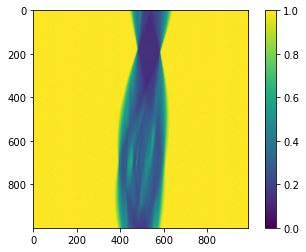

After ring removal:


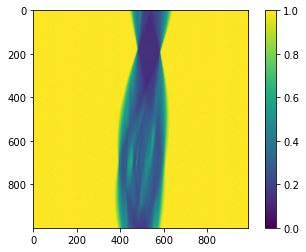

Difference:


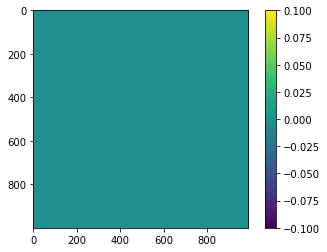

In [17]:
slice_num = 600
print("Before ring removal:")
plt.imshow(proj_norm[:, slice_num, :], vmin=0, vmax=1)
plt.colorbar()
plt.show()
print("After ring removal:")
plt.imshow(proj_rmv[:, slice_num, :], vmin=0, vmax=1)
plt.colorbar()
plt.show()
print("Difference:")
plt.imshow(proj_rmv[:, slice_num, :]-proj_norm[:, slice_num, :])
plt.colorbar()
plt.show()

# Minus log conversion

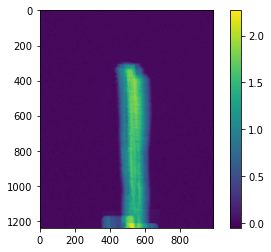

In [18]:
proj_mlog = tomopy.minus_log(proj_rmv)
plt.imshow(proj_mlog[0])
plt.colorbar()
plt.show()

# Remove Outliers again (optional)

In [ ]:
proj_mlog = tomopy.remove_outlier(proj_mlog, gamma_diff)
proj_mlog = tomopy.remove_nan(proj_mlog)
# proj_mlog = tomopy.remove_neg(proj_mlog)
plt.imshow(proj_mlog[0])
plt.colorbar()
plt.show()

# Find and correct tilt

Tilt correction ROI at 0 degree:


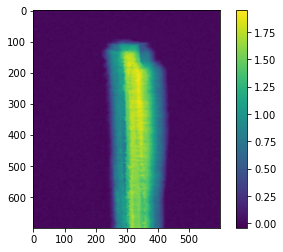

Tilt correction ROI at 180 degree:


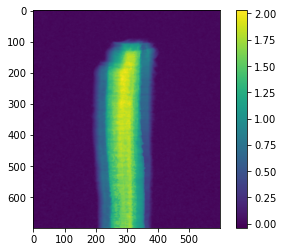

In [22]:
###################### need to change start
tt_xmin = 200
tt_xmax = 800
tt_ymin = 200
tt_ymax = 900
###################### need to change start
tt_roi = [tt_ymin, tt_xmin, tt_ymax, tt_xmax] # 
tt_0deg = proj_mlog[0, tt_roi[0]:tt_roi[2], tt_roi[1]:tt_roi[3]]
tt_180deg = proj_mlog[proj180_ind, tt_roi[0]:tt_roi[2], tt_roi[1]:tt_roi[3]]
print("Tilt correction ROI at 0 degree:")
plt.imshow(tt_0deg)
plt.colorbar()
plt.show()
print("Tilt correction ROI at 180 degree:")
plt.imshow(tt_180deg)
plt.colorbar()
plt.show()

In [23]:
print("Finding the tilt angle...")
tilt_ang = tilt.calculate_tilt(image0=tt_0deg, image180=tt_180deg)
print("Found the tilt angle: ", tilt_ang.x)

Finding the tilt angle...
Found the tilt angle:  0.07377669291773652


In [24]:
proj_mlog_tilt = tilt.apply_tilt_correction(proj_mlog, tilt_ang.x)
# proj_mlog_tilt = tilt.apply_tilt_correction(proj_mlog, 0.112)

# proj_tilt = tilt.apply_tilt_correction(proj_rmv, 0.112)

Applying tilt corr: 100%|██████████████████| 1000/1000 [00:09<00:00, 104.32it/s]


Projection at 0 degree:


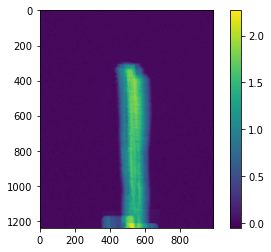

Projection at 180 degree (flipped):


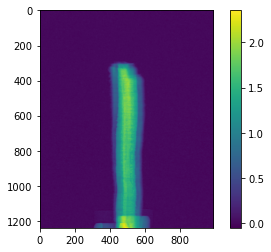

In [25]:
print("Projection at 0 degree:")
plt.imshow(proj_mlog[0])# vmin=0, vmax=1)
plt.colorbar()
plt.show()
print("Projection at 180 degree (flipped):")
plt.imshow(np.fliplr(proj_mlog[proj180_ind]))# vmin=0, vmax=1)
plt.colorbar()
plt.show()

# Find Center of Rotation

In [28]:
rot_center = tomopy.find_center_pc(np.squeeze(proj_mlog[0,:,:]), np.squeeze(proj_mlog[proj180_ind,:,:]), tol=0.5)
print('Estimated center of rotation:', rot_center) # 389.5

Estimated center of rotation: 513.5


In [27]:
rot_center = tomopy.find_center_pc(np.squeeze(proj_rmv[0,:,:]), np.squeeze(proj_rmv[proj180_ind,:,:]), tol=0.5)
print('Estimated center of rotation:', rot_center) # 389.5

Estimated center of rotation: 517.0


# Reconstruction

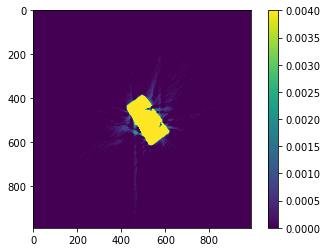

In [30]:
########## tomopy
recon = rocku.recon(proj_mlog_tilt, ang_rad, rot_center=rot_center, algorithm='gridrec')
# ########## svMBIR
# recon = recon(proj_tilt, theta, rot_center=rot_center, algorithm='svMBIR')
plt.imshow(recon[600, :, :], vmax=0.004, vmin=0)
plt.colorbar()
plt.show()

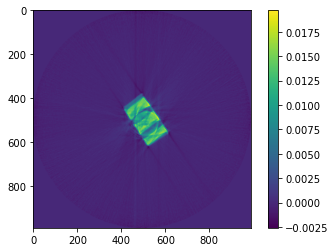

In [35]:
plt.imshow(recon[400, :, :])
plt.colorbar()
plt.show()

In [25]:
pix_um = 42.7 #um
pix_cm = pix_um/10000
recon_cm = recon/pix_cm

# Export recon files

In [26]:
################ change save path for your own
# save_to = "/HFIR/CG1D/IPTS-"+ipts+"/shared/autoreduce/rockit/" + sample_name# + "_vo"
save_to = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/rockit/" + sample_name + "_vo"
dxchange.write_tiff_stack(recon_cm, fname=save_to + "/recon", overwrite=True, digit=4)

# Export proj files (optional)

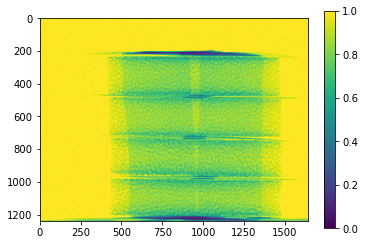

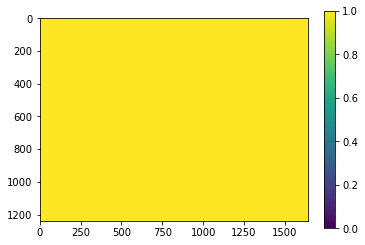

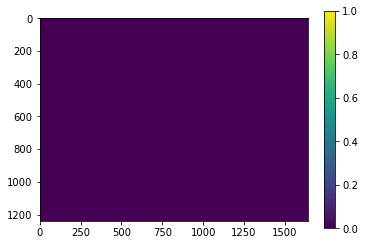

In [29]:
if proj_rmv.dtype == np.float32:
    proj_output = proj_rmv[:]
else:  
    proj_output = proj_rmv.astype(np.float32)
# proj_output = proj_norm.astype(np.float32)
# proj_output = np.exp(-1 * proj_output) # convert back to transmission
ob_output = np.ones((proj_output.shape[1],proj_output.shape[2]), dtype=proj_output.dtype)
dc_output = np.zeros((proj_output.shape[1],proj_output.shape[2]), dtype=proj_output.dtype)
plt.imshow(proj_output[0], vmin=0, vmax=1)
plt.colorbar()
plt.show()
plt.imshow(ob_output, vmin=0, vmax=1)
plt.colorbar()
plt.show()
plt.imshow(dc_output, vmin=0, vmax=1)
plt.colorbar()
plt.show()

In [59]:
################ change save path for your own
save_to = "/HFIR/CG1D/IPTS-"+ipts+"/shared/autoreduce/raw_to_recon/" + sample_name + "_norm"
dxchange.write_tiff_stack(proj_output, fname=save_to + "/raw", overwrite=True, digit=4)
dxchange.write_tiff(ob_output, fname=save_to + '/ob_0000', overwrite=True)
dxchange.write_tiff(dc_output, fname=save_to + '/dc_0000', overwrite=True)